In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [18]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [6]:
max_examples = 2000
data = data[:max_examples]
labels = labels[:max_examples]

test_data = test_data[:1000]
test_labels = test_labels[:1000]

print(len(test_data))

1000


In [106]:
for i in range(0,len(data)):
    for j in range(0, len(data[i])):
        if data[i][j] >= 0.5:
            data[i][j] = 1
        else:
            data[i][j] = 0

In [7]:
def display(i):
    img = data[i]
    plt.title('Example %d. Label: %d' % (i, labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

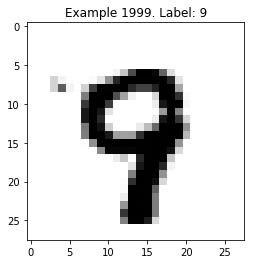

In [8]:
display(1999)

In [9]:
def d_label(i):
    op = []
    for j in range(0,10):
        if j == labels[i]:
            op.append(1)
        else:
            op.append(0)
    return(op)

d_label(1999)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [10]:

# weights = np.random.random((784,1))
w_data = []
for j in range(0,10):
    np.random.seed(0)
    weights = np.random.random((784,1))
    w_data.append(weights)

# print(len(data[0]))

In [11]:
print(w_data[0][0][0])

0.5488135039273248


In [12]:
def actual_output(i):
    aop = []
    for j in range(0,10):
        d = np.dot(data[i], w_data[j])
        aop.append(d[0]/784)
    return aop

def update_cell_weight(i, error, k):
#     print(w_data[i][263])
#     print("\n\n")

    LEARNING_RATE = 0.05
    for j in range(0,784):
        w_data[i][j][0] += LEARNING_RATE * data[k][j] * error
#     print(w_data[i][263])

    
def train(i):

    a_op = actual_output(i)
    i_op = d_label(i)
    a_op = np.asarray(a_op)
    i_op = np.asarray(i_op)
    error = np.subtract(i_op,a_op)
    
#     print(a_op)
#     print(i_op)
#     print(error)
    
    for j in range(0,10):
        update_cell_weight(j, error[j], i)
    
#     update_cell_weight(labels[i])



# train(1)
for i in range(0,len(data)):
    train(i)
# print(np.dot(data[99], weights))

[0.0953759881270815, 0.029412747749828876, 0.12783309348349597, 0.06313741315523236, 0.12334023322918695, 0.0407611220260492, 0.1300439529033005, 0.18347519445172664, 0.07720999706366083, 0.13889102150956079]


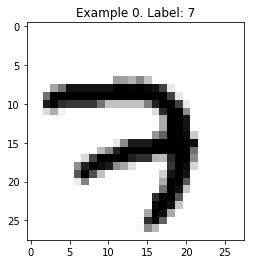

In [22]:
print(actual_output(0))
display(0)

In [14]:
def display_test(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

In [15]:
def prediction_ratio():
    result = []
    for k in range(0,len(test_data)):
        aop = []
        for j in range(0,10):
            d = np.dot(test_data[k], w_data[j])
            aop.append(d[0]/784)
        if aop.index(max(aop)) == test_labels[k]:
            result.append(1)
        else:
            result.append(0)
    return result
#     return aop.index(aop.)

X = prediction_ratio()

In [16]:
ones = 0
for i in range(0,1000):
    if X[i] == 1:
        ones+=1
print(ones/1000)


# print(w_data)

0.699


In [17]:
print(w_data)

[array([[ 5.48813504e-01],
       [ 7.15189366e-01],
       [ 6.02763376e-01],
       [ 5.44883183e-01],
       [ 4.23654799e-01],
       [ 6.45894113e-01],
       [ 4.37587211e-01],
       [ 8.91773001e-01],
       [ 9.63662761e-01],
       [ 3.83441519e-01],
       [ 7.91725038e-01],
       [ 5.28894920e-01],
       [ 5.68044561e-01],
       [ 9.25596638e-01],
       [ 7.10360582e-02],
       [ 8.71292997e-02],
       [ 2.02183974e-02],
       [ 8.32619846e-01],
       [ 7.78156751e-01],
       [ 8.70012148e-01],
       [ 9.78618342e-01],
       [ 7.99158564e-01],
       [ 4.61479362e-01],
       [ 7.80529176e-01],
       [ 1.18274426e-01],
       [ 6.39921021e-01],
       [ 1.43353287e-01],
       [ 9.44668917e-01],
       [ 5.21848322e-01],
       [ 4.14661940e-01],
       [ 2.64555612e-01],
       [ 7.74233689e-01],
       [ 4.56150332e-01],
       [ 5.68433949e-01],
       [ 1.87898004e-02],
       [ 6.17635497e-01],
       [ 6.12095723e-01],
       [ 6.15974145e-01],
       [ 9.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12156863510608673, 0.5176470875740051, 0.9960784912109375, 0.9921569228172302, 0.9960784912109375, 0.8352941870689392, 0.32156863808631897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

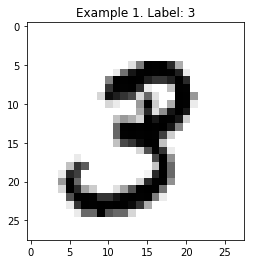

In [24]:
print(data[1].tolist())
display(1)

In [ ]:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12156863510608673, 0.5176470875740051, 0.9960784912109375, 0.9921569228172302, 0.9960784912109375, 0.8352941870689392, 0.32156863808631897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235294371843338, 0.5568627715110779, 0.9137255549430847, 0.988235354423523, 0.9921569228172302, 0.988235354423523, 0.9921569228172302, 0.988235354423523, 0.874509871006012, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48235297203063965, 0.9960784912109375, 0.9921569228172302, 0.9960784912109375, 0.9921569228172302, 0.8784314393997192, 0.7960785031318665, 0.7960785031318665, 0.874509871006012, 1.0, 0.8352941870689392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7960785031318665, 0.9921569228172302, 0.988235354423523, 0.9921569228172302, 0.8313726186752319, 0.0784313753247261, 0.0, 0.0, 0.2392157018184662, 0.9921569228172302, 0.988235354423523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16078431904315948, 0.9529412388801575, 0.8784314393997192, 0.7960785031318665, 0.7176470756530762, 0.16078431904315948, 0.5960784554481506, 0.11764706671237946, 0.0, 0.0, 1.0, 0.9921569228172302, 0.40000003576278687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1568627506494522, 0.0784313753247261, 0.0, 0.0, 0.40000003576278687, 0.9921569228172302, 0.19607844948768616, 0.0, 0.32156863808631897, 0.9921569228172302, 0.988235354423523, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32156863808631897, 0.8392157554626465, 0.12156863510608673, 0.4431372880935669, 0.9137255549430847, 0.9960784912109375, 0.9137255549430847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24313727021217346, 0.40000003576278687, 0.32156863808631897, 0.16078431904315948, 0.9921569228172302, 0.9098039865493774, 0.9921569228172302, 0.988235354423523, 0.9137255549430847, 0.19607844948768616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5960784554481506, 0.9921569228172302, 0.9960784912109375, 0.9921569228172302, 0.9960784912109375, 0.9921569228172302, 0.9960784912109375, 0.9137255549430847, 0.48235297203063965, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5960784554481506, 0.988235354423523, 0.9921569228172302, 0.988235354423523, 0.9921569228172302, 0.988235354423523, 0.7529412508010864, 0.19607844948768616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24313727021217346, 0.7176470756530762, 0.7960785031318665, 0.9529412388801575, 0.9960784912109375, 0.9921569228172302, 0.24313727021217346, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1568627506494522, 0.6745098233222961, 0.988235354423523, 0.7960785031318665, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235294371843338, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7176470756530762, 0.9960784912109375, 0.4392157196998596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24313727021217346, 0.7960785031318665, 0.6392157077789307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2392157018184662, 0.9921569228172302, 0.5921568870544434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235294371843338, 0.8392157554626465, 0.7529412508010864, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04313725605607033, 0.8352941870689392, 0.9960784912109375, 0.5921568870544434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.40000003576278687, 0.9921569228172302, 0.5921568870544434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16078431904315948, 0.8352941870689392, 0.988235354423523, 0.9921569228172302, 0.43529415130615234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16078431904315948, 1.0, 0.8352941870689392, 0.3607843220233917, 0.20000001788139343, 0.0, 0.0, 0.12156863510608673, 0.3607843220233917, 0.6784313917160034, 0.9921569228172302, 0.9960784912109375, 0.9921569228172302, 0.5568627715110779, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6745098233222961, 0.988235354423523, 0.9921569228172302, 0.988235354423523, 0.7960785031318665, 0.7960785031318665, 0.9137255549430847, 0.988235354423523, 0.9921569228172302, 0.988235354423523, 0.9921569228172302, 0.5098039507865906, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235294371843338, 0.7960785031318665, 1.0, 0.9921569228172302, 0.9960784912109375, 0.9921569228172302, 0.9960784912109375, 0.9921569228172302, 0.9568628072738647, 0.7960785031318665, 0.32156863808631897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0784313753247261, 0.5921568870544434, 0.5921568870544434, 0.9921569228172302, 0.6705882549285889, 0.5921568870544434, 0.5921568870544434, 0.1568627506494522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]